In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import Datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'Datetime'

In [3]:
tw_stcks = pd.read_csv('/kaggle/input/twitter-stock-market-dataset/Twitter Stock Market Dataset.csv')

In [6]:
tw_stcks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [7]:
tw_stcks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


Converting Date column to Date datatype.

In [8]:
tw_stcks['Date'] = pd.to_datetime(tw_stcks.Date)

In [9]:
tw_stcks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2264 non-null   datetime64[ns]
 1   Open       2259 non-null   float64       
 2   High       2259 non-null   float64       
 3   Low        2259 non-null   float64       
 4   Close      2259 non-null   float64       
 5   Adj Close  2259 non-null   float64       
 6   Volume     2259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


Creating a new column for years.

In [11]:
tw_stcks['Year'] = tw_stcks.Date.dt.year

The dataset contains data about:

Date
The opening Price of the day,
The highest price of the day,
The lowest price of the day,
The closing price of the day,
The adjusted closing price of the day,
The total number of shares traded in the day (volume)

In [12]:
tw_stcks['Year'].value_counts()

Year
2020    253
2014    252
2015    252
2016    252
2019    252
2021    252
2017    251
2018    251
2022    212
2013     37
Name: count, dtype: int64

In [14]:
tw_stcks['Volume'].sort_values(ascending=False)

2115    269213085.0
2123    258868339.0
2116    217520098.0
724     192269255.0
2129    176803635.0
           ...     
2259            NaN
2260            NaN
2261            NaN
2262            NaN
2263            NaN
Name: Volume, Length: 2264, dtype: float64

Text(0.5, 1.0, 'Missing Values')

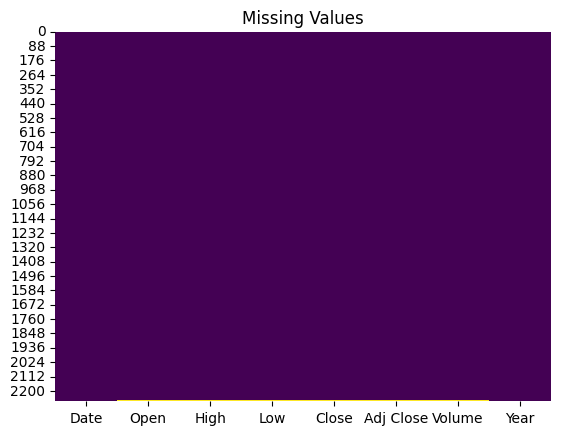

In [16]:
sns.heatmap(tw_stcks.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Values')

In [17]:
tw_stcks.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
Year         0
dtype: int64

In [18]:
tw_stcks.dropna(axis=0,inplace=True)

In [19]:
tw_stcks.isnull().sum()#confirming removal of null rows.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
dtype: int64

In [20]:
tw_stcks.shape

(2259, 8)

There are 2259 rows of data.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

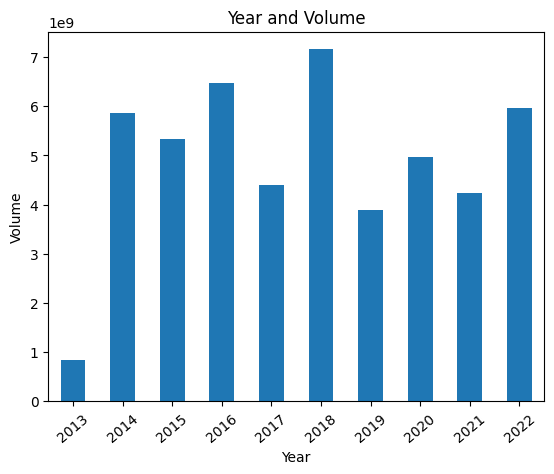

In [24]:
tw_stcks.groupby('Year')['Volume'].sum().plot.bar()
plt.title('Year and Volume')
plt.ylabel('Volume')
plt.xticks(rotation=40)

2018 had the most volume.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

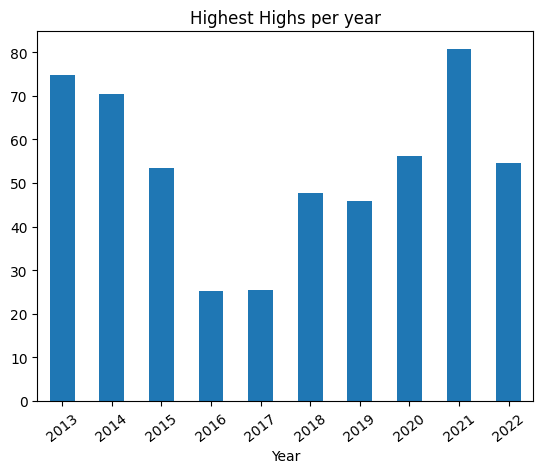

In [35]:
tw_stcks.groupby('Year')['High'].max().plot.bar()
plt.title('Highest Highs per year')
plt.xticks(rotation=38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

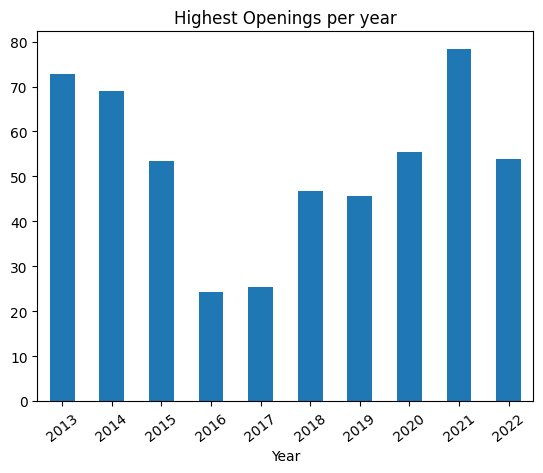

In [34]:
tw_stcks.groupby('Year')['Open'].max().plot.bar()
plt.title('Highest Openings per year')
plt.xticks(rotation=38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

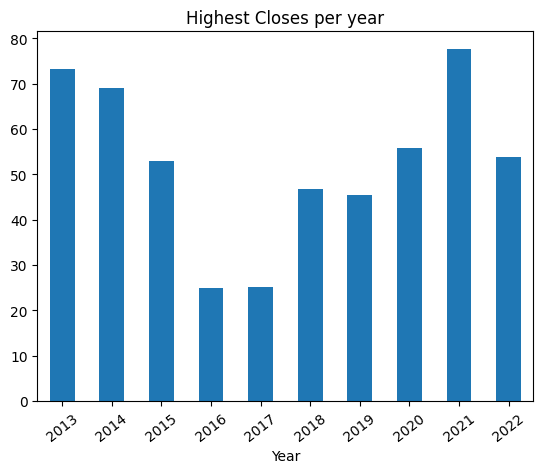

In [33]:
tw_stcks.groupby('Year')['Close'].max().plot.bar()
plt.title('Highest Closes per year')
plt.xticks(rotation=38)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021'),
  Text(9, 0, '2022')])

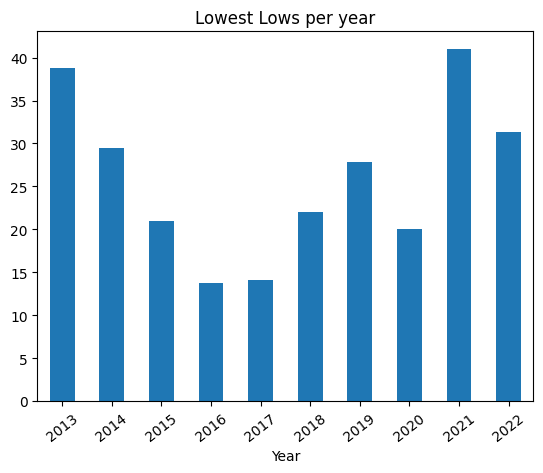

In [32]:
tw_stcks.groupby('Year')['Low'].min().plot.bar()
plt.title('Lowest Lows per year')
plt.xticks(rotation=38)

2021 is the year with the best stats.